<a href="https://colab.research.google.com/github/Afreen-Sayyad/Sayyad-Afreen/blob/main/content_extract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q transformers

In [ ]:
!pip install -q youtube_transcript_api

In [ ]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [ ]:
youtube_video="https://www.youtube.com/watch?v=JlQB0yZw2as"

In [ ]:
video_id=youtube_video.split("=")[1]

NameError: name 'youtube_video' is not defined

In [ ]:
video_id

'JlQB0yZw2as'

In [ ]:
from youtube_transcript_api import YouTubeTranscriptApi


transcript = YouTubeTranscriptApi.get_transcript(video_id)


In [ ]:
transcript[0:5]

[{'text': 'In this lecture, we discuss PIN diodes and\ncontrol circuits.',
  'start': 28.49,
  'duration': 10.92},
 {'text': 'So, a PIN diode, it contains an intrinsic\nor lightly doped layer in between P and N',
  'start': 39.41,
  'duration': 14.74},
 {'text': 'layers, and that is why the name of this diode\nis PIN.',
  'start': 54.15,
  'duration': 4.13},
 {'text': 'The addition of intrinsic region reduces the\njunction capacitance since P and N regions',
  'start': 58.28,
  'duration': 14.949},
 {'text': 'are now further apart.', 'start': 73.229, 'duration': 3.861}]

In [ ]:
result=" "
for i in transcript:
    result +=' '+i['text']
print(len(result))

8882


In [ ]:
summarizer=pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
num_iters=int(len(result)/1000)
summarized_text=[]
for i in range(0,num_iters+1):
  start=i*1000
  end=(i+1)*1000
  out=summarizer(result[start:end])
  out=out[0]
  out=out['summary_text']
  summarized_text.append(out)

print(summarized_text)

[' PIN diodes contain an intrinsic or lightly doped layer in between P and N layers . The introduction of this intrinsic region makes forward conductivity of the diode a much more linear function of diode bias current . The addition of intrinsic region reduces the capacitance of the P-N region of a PIN diode .', " A single pole single throwor SPST switch can be used as a switch, and the impedance of the device can be controlled by changing the device's bias . We will start our discussion with a single-pole-driven diode switch . This is also called 'SPST', Single Pole Single-pole Single-Device-Switch .", ' P side of the diode is connected to the bias through an Rf choke . The purpose of this choke is to provide a high impedance for the signal and a DC . This inductor will be a short circuit . So, this choke will prevent flow of signal from the bias source . Signal will flow from the source towards the source or the load .', ' VL is the voltage when the diode is present, V naught would h

In [ ]:
len(str(summarized_text))

2849

In [ ]:
yt=str(summarized_text)
print(yt)

[' PIN diodes contain an intrinsic or lightly doped layer in between P and N layers . The introduction of this intrinsic region makes forward conductivity of the diode a much more linear function of diode bias current . The addition of intrinsic region reduces the capacitance of the P-N region of a PIN diode .', " A single pole single throwor SPST switch can be used as a switch, and the impedance of the device can be controlled by changing the device's bias . We will start our discussion with a single-pole-driven diode switch . This is also called 'SPST', Single Pole Single-pole Single-Device-Switch .", ' P side of the diode is connected to the bias through an Rf choke . The purpose of this choke is to provide a high impedance for the signal and a DC . This inductor will be a short circuit . So, this choke will prevent flow of signal from the bias source . Signal will flow from the source towards the source or the load .', ' VL is the voltage when the diode is present, V naught would h

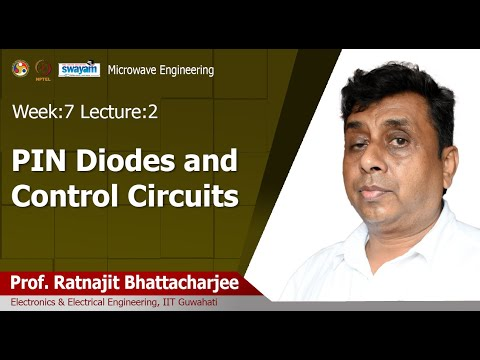

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [ ]:
import requests
from bs4 import BeautifulSoup

def get_page_content(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to retrieve the page. Status code: {response.status_code}")
        return None

def extract_text(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    # Modify the 'find' and 'find_all' methods based on the HTML structure of the webpage
    # to target the specific elements you want to extract.
    important_elements = soup.find_all('p')  # Example: Extracting all paragraphs

    extracted_text = ""
    for element in important_elements:
        extracted_text += element.get_text() + "\n"

    return extracted_text

if __name__ == "__main__":
    url = "https://en.wikipedia.org/wiki/PIN_diode"  # Replace with the URL of the webpage you want to scrape
    page_content = get_page_content(url)

    if page_content:
        extracted_text = extract_text(page_content)
        print(extracted_text)


In [ ]:
from transformers import pipeline

In [ ]:
summarizer=pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
num_iters=int(len(extracted_text)/1000)
summarized_text=[]
for i in range(0,num_iters+1):
  start=i*1000
  end=(i+1)*1000
  out=summarizer(extracted_text[start:end])
  out=out[0]
  out=out['summary_text']
  summarized_text.append(out)

print(summarized_text)

Your max_length is set to 142, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[' A PIN diode is a diode with a wide, undoped intrinsic semiconductor region . The wide intrinsic region makes the diode an inferior rectifier, but it makes it suitable for attenuators, fast switches, photodetectors, and high-voltage power electronics applications .', ' PIN diode obeys the standard diode equation for low-frequency signals . The P-I-N diode has a relatively large stored charge adrift in a thick intrinsic region . At higher frequencies, the diode looks like an almost perfect (very linear, even for large signals) resistor .', ' The time required to sweep the stored charge from a diode junction is its reverse recovery time . PIN diode, suitably biased, therefore acts as a variable resistor . The high-frequency resistance is inversely proportional to the DC bias current through the diode . The resistance may vary over a wide range (from 0.1 to 10 kΩ in some cases)', ' In a PIN diode the depletion region exists almost completely within the intrinsic region . This depletion 

In [ ]:
br=str(summarized_text)
print(br)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def calculate_similarity(youtube_text, browser_text):
    # Create TF-IDF vectors
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([youtube_text, browser_text])

    # Calculate cosine similarity between the vectors
    similarity = cosine_similarity(vectors[0], vectors[1])[0][0]

    # Convert similarity to percentage (optional)
    similarity_percentage = similarity * 100

    return similarity_percentage


youtube_text = yt
browser_text = br

similarity = calculate_similarity(youtube_text, browser_text)
print(f"Cosine Similarity Percentage: {similarity}%")


NameError: name 'yt' is not defined